# Photoelectric Effect Starter

You'll be collecting Current vs. Voltage data from a photocell, using several wavelengths of light.   The goal is to see how the stopping voltage depends on the wavelength of light.

First do the normal imports/ mounting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load a data file from this experiment
For this demonstration, I am importing current vs. voltage data from the photocell which was illuminated with the green laser.  

In [4]:
example_IV = np.genfromtxt('/content/drive/MyDrive/Starter Notebooks for 315 labs/Photoelectric Effect/laser5cm1.txt',dtype=float, delimiter='\t')

V = example_IV[:,0]
I = example_IV[:,1]

Plotting the current vs. voltage relationship, you can see the "activation" form, i.e. the current suddenly starts to increase beyond a certain applied voltage known as the "stopping voltage".

Text(0, 0.5, 'Current (A)')

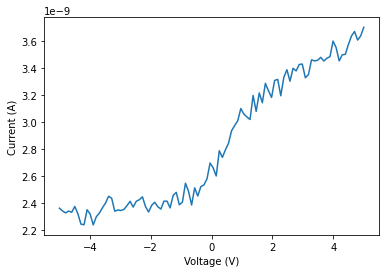

In [5]:
plt.plot(V, I)
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')

You need to estimate the stopping voltage for each of your measurements (i.e. different wavelengths and perhaps different intensities) and try to use them to confirm the relevant equations for this experiment.  

Finding the stopping voltage is a "problem of definition".  As you can see above, there is some curvature to the "kink" we expect theoretically (think / write about *why* there could be curvature).

One way to address this is to fit two straight lines:  one to the "flat" part, and one to the "increasing" part, and find their intersection.  Below is an example of how to do that.

### Finding the stopping voltage using two straight lines

First, we need to decide what part of our I and V arrays correspond to the "flat" part and the "increasing" part.  This is part of the problem of definition.  Different people will pick different ranges to fit.  Include this kind of uncertainty in your uncertainty estimates!

Looking at the curve above, one might decide that the "flat" part is between -5 and -2 V, and the "increasing" part is between -1 and 1 V.  To slice the arrays we need to know the indices corresponding to these ranges.


In [7]:
flat = np.where((V>-5.) & (V<-2.))  # this gives the indices for the flat part of the curve
inc = np.where((V>-1.) & (V<1.)) # this gives the indices for the increasing part of the curve


Vflat = V[flat]
Iflat = I[flat]

Vinc = V[inc]
Iinc = I[inc]

Checking that we picked it right...

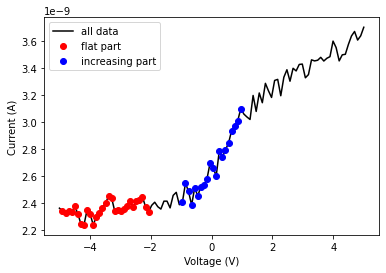

In [8]:
plt.plot(V,I,'k')
plt.plot(Vflat,Iflat,'ro')
plt.plot(Vinc,Iinc,'bo')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.legend(['all data','flat part','increasing part'])


now we can fit the lines to these regions and find out where they cross



In [9]:
Zflat, covflat = np.polyfit(Vflat, Iflat, 1, cov=True)
stdev_flat = np.sqrt(np.diag(covflat)) # this is the uncertainty on the fitted parameters 

Zinc, covinc = np.polyfit(Vinc, Iinc, 1, cov=True) 
stdev_inc = np.sqrt(np.diag(covinc))  # this is the uncertainty on the fitted parameters 

print(Zflat)  # first parameter is the slope, second is the intercept
print(Zinc) # first parameter is the slope, second is the intercept

flatline = np.poly1d(Zflat) # turns flatline into a function you can use to plot the line of best fit (see below)
incline = np.poly1d(Zinc) # turns incline into a function you can use to plot the line of best fit (see below)

[3.40099264e-11 2.47192621e-09]
[3.34964743e-10 2.67812000e-09]


Plot the fitted results and zoom in on the region of crossing to see if it looks reasonable as a stopping voltage.

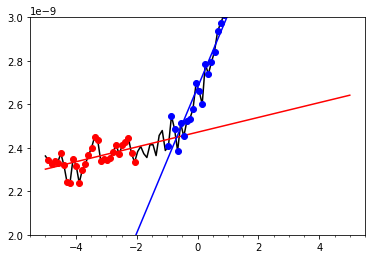

In [21]:
ax = plt.axes(xscale='linear', yscale='linear')
plt.plot(V,I,'k')
plt.plot(Vflat,Iflat,'ro')
plt.plot(V,flatline(V),'r')
plt.plot(Vinc,Iinc,'bo')
plt.plot(V,incline(V),'b')
plt.ylim([2e-9,3e-9])
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.xaxis.set_minor_locator(plt.MaxNLocator(24))

## What next?

To determine the stopping voltage, you can find the intersection of the two lines using algebra.

You also need to find the *uncertainty* in the stopping voltage, and you must think about ways to do this!  

Perhaps you could propagate your uncertainties in the fitting parameters through the equation you used to solve for the intersection.  Is that going to be a reasonable value for the uncertainty?  How else would the stopping voltage number vary?


After you figure out all your stopping voltages, you should see how they depend on the wavelength and intensity of light.  Use graphs with errorbars and appropriate fits to make your point.